<a href="https://colab.research.google.com/github/Rockydedhia/pythonproject/blob/master/E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd


In [4]:
df=pd.read_csv("/content/Ecommerce.csv",encoding= 'unicode_escape')

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
276170,561034,21967,PACK OF 12 SKULL TISSUES,4.0,7/24/2011 11:45,0.29,15506.0,United Kingdom
276171,561034,21982,PACK OF 12 SUKI TISSUES,1.0,7/24/2011 11:45,0.29,15506.0,United Kingdom
276172,561034,22615,PACK OF 12 CIRCUS PARADE TISSUES,2.0,7/24/2011 11:45,0.29,15506.0,United Kingdom
276173,561034,22616,PACK OF 12 LONDON TISSUES,4.0,7/24/2011 11:45,0.29,15506.0,United Kingdom


##2. Check for missing values in all columns and replace them with the appropriate metric 
##(Mean/Median/Mode) 


In [6]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description     1007
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     78877
Country            1
dtype: int64

In [7]:
df.dropna(subset=['Description'],inplace=True)

In [8]:
df['CustomerID'].fillna(df['CustomerID'].median(),inplace=True)

In [9]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       1
InvoiceDate    1
UnitPrice      1
CustomerID     0
Country        1
dtype: int64

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
df.groupby("CustomerID")["Quantity"].count()

CustomerID
12346.0      2
12347.0    102
12348.0     28
12350.0     17
12352.0     48
          ... 
18277.0      1
18280.0     10
18281.0      7
18283.0    400
18287.0     29
Name: Quantity, Length: 3139, dtype: int64

## **Remove duplicate rows**

In [12]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1.0,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1.0,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1.0,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1.0,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1.0,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
275148,560937,22538,MINI JIGSAW GO TO THE FAIR,1.0,7/22/2011 10:52,0.42,17920.0,United Kingdom
275149,560937,22539,MINI JIGSAW DOLLY GIRL,1.0,7/22/2011 10:52,0.42,17920.0,United Kingdom
275150,560937,22546,MINI JIGSAW PURDEY,1.0,7/22/2011 10:52,0.42,17920.0,United Kingdom
276005,561026,22094,RED RETROSPOT TISSUE BOX,1.0,7/24/2011 10:49,0.39,17265.0,United Kingdom


In [13]:
df.shape

(275168, 8)

In [14]:
df.drop(df[df.duplicated()].index,axis="rows",inplace=True)

In [15]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
276170,561034,21967,PACK OF 12 SKULL TISSUES,4.0,7/24/2011 11:45,0.29,15506.0,United Kingdom
276171,561034,21982,PACK OF 12 SUKI TISSUES,1.0,7/24/2011 11:45,0.29,15506.0,United Kingdom
276172,561034,22615,PACK OF 12 CIRCUS PARADE TISSUES,2.0,7/24/2011 11:45,0.29,15506.0,United Kingdom
276173,561034,22616,PACK OF 12 LONDON TISSUES,4.0,7/24/2011 11:45,0.29,15506.0,United Kingdom


## **Remove rows which have negative values in Quantity column**

In [16]:
df=df[df["Quantity"]>0]

In [17]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
276169,561034,22553,PLASTERS IN TIN SKULLS,1.0,7/24/2011 11:45,1.65,15506.0,United Kingdom
276170,561034,21967,PACK OF 12 SKULL TISSUES,4.0,7/24/2011 11:45,0.29,15506.0,United Kingdom
276171,561034,21982,PACK OF 12 SUKI TISSUES,1.0,7/24/2011 11:45,0.29,15506.0,United Kingdom
276172,561034,22615,PACK OF 12 CIRCUS PARADE TISSUES,2.0,7/24/2011 11:45,0.29,15506.0,United Kingdom


# Add the columns - Month, Day and Hour for the invoice

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267715 entries, 0 to 276173
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    267715 non-null  object 
 1   StockCode    267715 non-null  object 
 2   Description  267715 non-null  object 
 3   Quantity     267715 non-null  float64
 4   InvoiceDate  267715 non-null  object 
 5   UnitPrice    267715 non-null  float64
 6   CustomerID   267715 non-null  float64
 7   Country      267715 non-null  object 
dtypes: float64(3), object(5)
memory usage: 18.4+ MB


In [19]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
276169   2011-07-24 11:45:00
276170   2011-07-24 11:45:00
276171   2011-07-24 11:45:00
276172   2011-07-24 11:45:00
276173   2011-07-24 11:45:00
Name: InvoiceDate, Length: 267715, dtype: datetime64[ns]

In [21]:
df["Hour"]=df["InvoiceDate"].dt.hour
df["Month"]=df["InvoiceDate"].dt.month
df["Day"]=df["InvoiceDate"].dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [22]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,12,1
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,1
...,...,...,...,...,...,...,...,...,...,...,...
276169,561034,22553,PLASTERS IN TIN SKULLS,1.0,2011-07-24 11:45:00,1.65,15506.0,United Kingdom,11,7,24
276170,561034,21967,PACK OF 12 SKULL TISSUES,4.0,2011-07-24 11:45:00,0.29,15506.0,United Kingdom,11,7,24
276171,561034,21982,PACK OF 12 SUKI TISSUES,1.0,2011-07-24 11:45:00,0.29,15506.0,United Kingdom,11,7,24
276172,561034,22615,PACK OF 12 CIRCUS PARADE TISSUES,2.0,2011-07-24 11:45:00,0.29,15506.0,United Kingdom,11,7,24


In [23]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Hour           0
Month          0
Day            0
dtype: int64

# How many orders made by the customers?

In [24]:
orders=df.groupby(['CustomerID'])['Quantity'].sum()
print(orders)

CustomerID
12346.0    74215.0
12347.0     1313.0
12348.0     2124.0
12350.0      197.0
12352.0      254.0
            ...   
18273.0       20.0
18280.0       45.0
18281.0       54.0
18283.0      624.0
18287.0      488.0
Name: Quantity, Length: 3094, dtype: float64


## TOP 5 customers with higher number of orders


In [25]:
orders.head()

CustomerID
12346.0    74215.0
12347.0     1313.0
12348.0     2124.0
12350.0      197.0
12352.0      254.0
Name: Quantity, dtype: float64

# How much money spent by the customers? 

In [26]:

Money=df.groupby(['CustomerID'])['UnitPrice'].sum()
print(Money)

CustomerID
12346.0       1.04
12347.0     278.67
12348.0     136.21
12350.0      65.30
12352.0    1043.08
            ...   
18273.0       2.55
18280.0      47.65
18281.0      39.36
18283.0     653.58
18287.0      56.92
Name: UnitPrice, Length: 3094, dtype: float64


## **TOP 5 customers with highest money spent**

In [27]:
Money.sort_values(ascending = False).head()


CustomerID
15152.0    479137.92
14911.0     13000.60
17841.0      8459.22
16029.0      8458.53
12744.0      6712.57
Name: UnitPrice, dtype: float64

## How many orders per month? 

In [28]:

Per_month=df.groupby(['Month'])['Quantity'].sum().reset_index(name ='Total_Order_Per_Month')
print(Per_month)

   Month  Total_Order_Per_Month
0      1               387366.0
1      2               283041.0
2      3               380158.0
3      4               309418.0
4      5               397099.0
5      6               392822.0
6      7               284415.0
7     12               359209.0


## How many orders per day? 


In [29]:

Per_Day=df.groupby(['Day'])['Quantity'].sum().reset_index(name ='Total_Order_Per_Day')
print(Per_Day)

    Day  Total_Order_Per_Day
0     1              95685.0
1     2              64168.0
2     3              80862.0
3     4              81952.0
4     5             104495.0
5     6             109988.0
6     7             114678.0
7     8             105251.0
8     9              95668.0
9    10             101809.0
10   11              97416.0
11   12              97643.0
12   13              94856.0
13   14             127806.0
14   15             105636.0
15   16              99251.0
16   17             123682.0
17   18             171477.0
18   19              98070.0
19   20             113524.0
20   21             115152.0
21   22              80387.0
22   23              71943.0
23   24              71325.0
24   25              54656.0
25   26              47090.0
26   27              64974.0
27   28              67224.0
28   29              48940.0
29   30              45958.0
30   31              41962.0


## **How many orders per hour?**

In [30]:

Per_Hour=df.groupby(['Hour'])['Quantity'].sum().reset_index(name ='Total_Order_Per_Day')
print(Per_Hour)

    Hour  Total_Order_Per_Day
0      7               5832.0
1      8              77756.0
2      9             237061.0
3     10             451254.0
4     11             350312.0
5     12             409844.0
6     13             362540.0
7     14             292159.0
8     15             305592.0
9     16             162808.0
10    17              80310.0
11    18              31336.0
12    19              23820.0
13    20               2904.0


# How many orders for each country

In [31]:

Per_Country=df.groupby(['Country'])['Quantity'].sum().reset_index(name ='Total_Order_Per_Day')
print(Per_Country)

                 Country  Total_Order_Per_Day
0              Australia              55537.0
1                Austria               2262.0
2                Bahrain                314.0
3                Belgium              11368.0
4                 Brazil                356.0
5                 Canada               2711.0
6        Channel Islands               4535.0
7                 Cyprus               4612.0
8         Czech Republic                346.0
9                Denmark               3469.0
10                  EIRE              66663.0
11    European Community                499.0
12               Finland               6944.0
13                France              55005.0
14               Germany              61570.0
15                Greece               1321.0
16             Hong Kong               3593.0
17               Iceland               1313.0
18                Israel               1049.0
19                 Italy               3190.0
20                 Japan          

##Orders trend across months

In [32]:
Per_Month=df.groupby(['Month'])['Quantity'].sum().reset_index(name ='Total_Order_Per_Month')
print(Per_Month)

   Month  Total_Order_Per_Month
0      1               387366.0
1      2               283041.0
2      3               380158.0
3      4               309418.0
4      5               397099.0
5      6               392822.0
6      7               284415.0
7     12               359209.0


##How much money spent by each country?

In [33]:

Money_spend_ctry=df.groupby(['Country'])['UnitPrice'].sum().reset_index(name ='Total_Money_By_each_county')
print(Money_spend_ctry)

                 Country  Total_Money_By_each_county
0              Australia                 2576.870000
1                Austria                  797.560000
2                Bahrain                   82.760000
3                Belgium                 3447.170000
4                 Brazil                  142.600000
5                 Canada                  905.590000
6        Channel Islands                 1914.680000
7                 Cyprus                 2220.080000
8         Czech Republic                   28.890000
9                Denmark                  644.250000
10                  EIRE                21829.030000
11    European Community                  289.800000
12               Finland                 1863.510000
13                France                14653.680000
14               Germany                16763.910000
15                Greece                  499.930000
16             Hong Kong                 3136.330000
17               Iceland                  278.

In [79]:
df1=df._get_numeric_data()
df1

,Quantity,UnitPrice,CustomerID,Hour,Month,Day
0,6.0,2.55,17850.0,8,12,1
1,6.0,3.39,17850.0,8,12,1
2,8.0,2.75,17850.0,8,12,1
3,6.0,3.39,17850.0,8,12,1
4,6.0,3.39,17850.0,8,12,1
...,...,...,...,...,...,...
276169,1.0,1.65,15506.0,11,7,24
276170,4.0,0.29,15506.0,11,7,24
276171,1.0,0.29,15506.0,11,7,24
276172,2.0,0.29,15506.0,11,7,24


In [35]:
df[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Month,Day


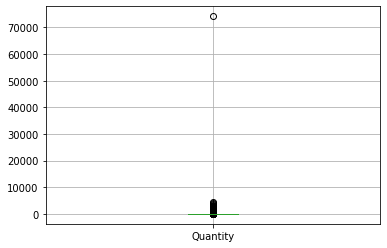

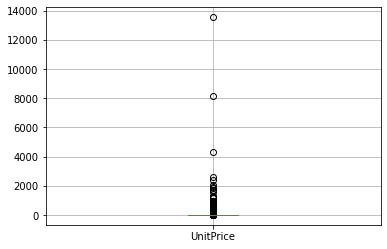

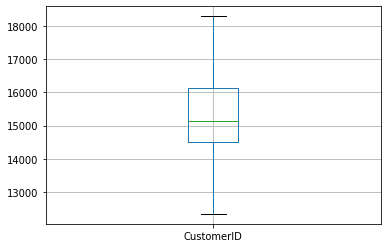

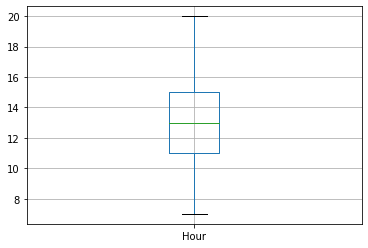

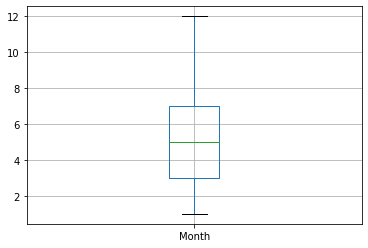

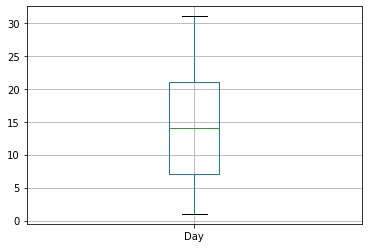

In [36]:
import matplotlib.pyplot as plt

for column in df1:
    plt.figure()
    df.boxplot([column])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267715 entries, 0 to 276173
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    267715 non-null  object        
 1   StockCode    267715 non-null  object        
 2   Description  267715 non-null  object        
 3   Quantity     267715 non-null  float64       
 4   InvoiceDate  267715 non-null  datetime64[ns]
 5   UnitPrice    267715 non-null  float64       
 6   CustomerID   267715 non-null  float64       
 7   Country      267715 non-null  object        
 8   Hour         267715 non-null  int64         
 9   Month        267715 non-null  int64         
 10  Day          267715 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 24.5+ MB


<Figure size 432x288 with 0 Axes>

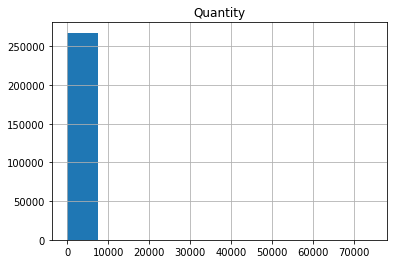

<Figure size 432x288 with 0 Axes>

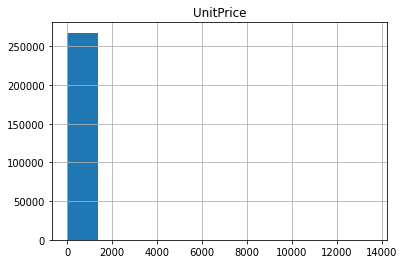

<Figure size 432x288 with 0 Axes>

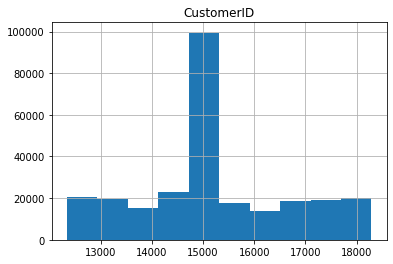

<Figure size 432x288 with 0 Axes>

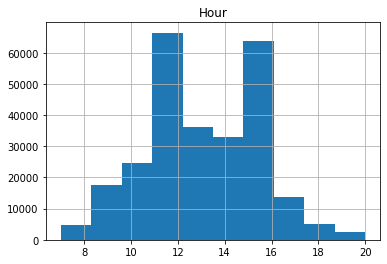

<Figure size 432x288 with 0 Axes>

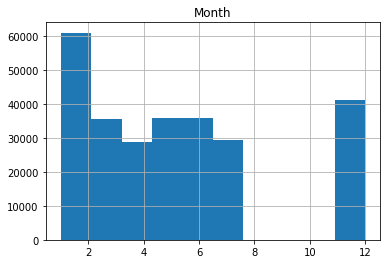

<Figure size 432x288 with 0 Axes>

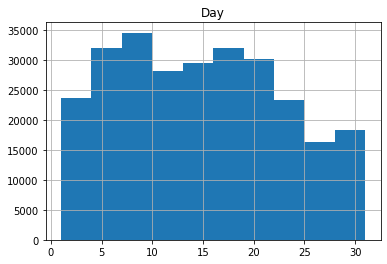

In [38]:
for column in df1:
    plt.figure()
    df.hist([column])

In [40]:


for column in df1:
    plt.figure()
    df.distplot([column])

AttributeError: ignored

<Figure size 432x288 with 0 Axes>

In [41]:
df.describe()

,Quantity,UnitPrice,CustomerID,Hour,Month,Day
count,267715.000000,267715.000000,267715.000000,267715.000000,267715.000000,267715.000000
mean,10.434709,4.100209,15249.518391,13.060975,5.244170,14.379747
std,149.105388,36.469364,1460.594895,2.479619,3.409069,8.123313
min,1.000000,0.000000,12346.000000,7.000000,1.000000,1.000000
25%,1.000000,1.250000,14499.000000,11.000000,3.000000,7.000000
50%,3.000000,2.100000,15152.000000,13.000000,5.000000,14.000000
75%,10.000000,4.150000,16131.000000,15.000000,7.000000,21.000000
max,74215.000000,13541.330000,18287.000000,20.000000,12.000000,31.000000


In [42]:
for col in df:
    print(df[col].unique())

['536365' '536366' '536367' ... '561032' '561033' '561034']
['85123A' '71053' '84406B' ... '84387A' '16169E' '84857B']
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'BIRD ON BRANCH CANVAS SCREEN'
 "WRAP 50'S  CHRISTMAS" 'BLUE MONTE CARLO HANDBAG']
[6.0000e+00 8.0000e+00 2.0000e+00 3.2000e+01 3.0000e+00 4.0000e+00
 2.4000e+01 1.2000e+01 4.8000e+01 1.8000e+01 2.0000e+01 3.6000e+01
 8.0000e+01 6.4000e+01 1.0000e+01 1.2000e+02 9.6000e+01 2.3000e+01
 5.0000e+00 1.0000e+00 5.0000e+01 4.0000e+01 1.0000e+02 1.9200e+02
 4.3200e+02 1.4400e+02 2.8800e+02 1.6000e+01 9.0000e+00 1.2800e+02
 2.5000e+01 3.0000e+01 2.8000e+01 7.0000e+00 7.2000e+01 2.0000e+02
 6.0000e+02 4.8000e+02 1.4000e+01 1.1000e+01 3.3000e+01 1.3000e+01
 7.0000e+01 2.5200e+02 6.0000e+01 2.1600e+02 3.8400e+02 2.7000e+01
 1.5000e+01 2.2000e+01 1.9000e+01 1.7000e+01 2.1000e+01 3.4000e+01
 4.7000e+01 1.0800e+02 5.2000e+01 7.5000e+01 2.7000e+02 4.2000e+01
 2.4000e+02 9.0000e+01 3.2000e

In [43]:
df.duplicated().sum()

0

In [44]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,12,1
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,1


In [45]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Hour           0
Month          0
Day            0
dtype: int64

In [46]:
df.Description.

SyntaxError: ignored

In [ ]:
c=df.Description.median()

In [47]:
c

NameError: ignored

In [ ]:
df["Description"].fillna(df["CustomerID"].median()[0],inplace=True)

In [ ]:
df.info()

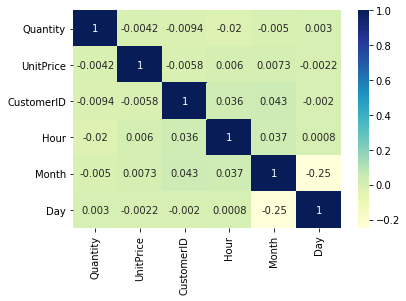

In [48]:
import seaborn as sb
sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)


In [49]:
for column in df1:
    plt.figure()
    df.line([column])

AttributeError: ignored

<Figure size 432x288 with 0 Axes>

In [55]:
df["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     1441
REGENCY CAKESTAND 3 TIER               1245
JUMBO BAG RED RETROSPOT                1173
PARTY BUNTING                          1135
LUNCH BAG RED RETROSPOT                 908
                                       ... 
GLASS BELL JAR LARGE                      1
CREAM CLIMBING HYDRANGA ART FLOWER        1
SILICON CUBE 25W, BLUE                    1
T-LIGHT HOLDER SILVER SAUCER              1
incorrectly credited C550456 see 47       1
Name: Description, Length: 3611, dtype: int64

In [56]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Hour           0
Month          0
Day            0
dtype: int64

In [57]:
df["CustomerID"].fillna(df["CustomerID"].median()[0],inplace=True)

TypeError: ignored

In [60]:
df.shape

(267715, 11)

In [61]:
df["CustomerID"]

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
276169    15506.0
276170    15506.0
276171    15506.0
276172    15506.0
276173    15506.0
Name: CustomerID, Length: 267715, dtype: float64

In [62]:
df['CustomerID'].median()

15152.0

In [63]:
df[df.isnull().any(axis=1)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Month,Day


In [64]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Hour           0
Month          0
Day            0
dtype: int64

In [72]:
Skew=df1.skew(axis = 0)

Quantity      461.176725
UnitPrice     246.226408
CustomerID      0.116031
Hour            0.036159
Month           0.836653
Day             0.191521
dtype: float64

In [80]:
df1

,Quantity,UnitPrice,CustomerID,Hour,Month,Day
0,6.0,2.55,17850.0,8,12,1
1,6.0,3.39,17850.0,8,12,1
2,8.0,2.75,17850.0,8,12,1
3,6.0,3.39,17850.0,8,12,1
4,6.0,3.39,17850.0,8,12,1
...,...,...,...,...,...,...
276169,1.0,1.65,15506.0,11,7,24
276170,4.0,0.29,15506.0,11,7,24
276171,1.0,0.29,15506.0,11,7,24
276172,2.0,0.29,15506.0,11,7,24


In [ ]:
num=['Quantity','UnitPrice','CustomerID','Hour','Day']

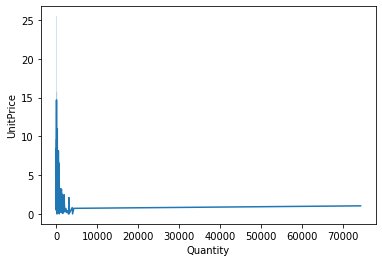

In [97]:
sns.lineplot(data=df1, x="Quantity", y="UnitPrice")

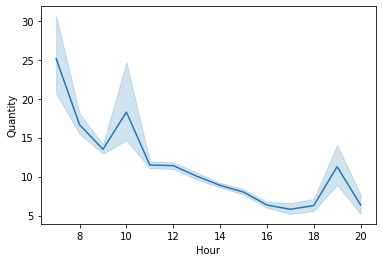

In [100]:
sns.lineplot(data=df1, x="Hour", y="Quantity")

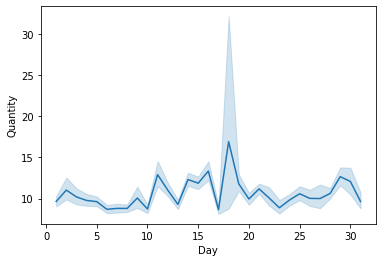

In [102]:
sns.lineplot(data=df1, x="Day", y="Quantity")

##Plot the skewness - All Numeric Variables 

In [103]:
df1

,Quantity,UnitPrice,CustomerID,Hour,Month,Day
0,6.0,2.55,17850.0,8,12,1
1,6.0,3.39,17850.0,8,12,1
2,8.0,2.75,17850.0,8,12,1
3,6.0,3.39,17850.0,8,12,1
4,6.0,3.39,17850.0,8,12,1
...,...,...,...,...,...,...
276169,1.0,1.65,15506.0,11,7,24
276170,4.0,0.29,15506.0,11,7,24
276171,1.0,0.29,15506.0,11,7,24
276172,2.0,0.29,15506.0,11,7,24


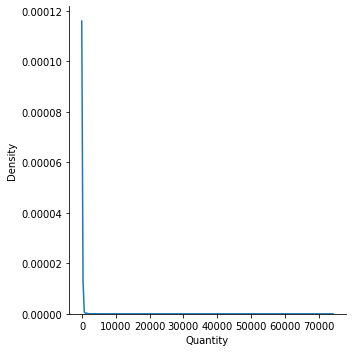

In [105]:
sns.displot(df1, x="Quantity", kind="kde", bw_adjust=2)

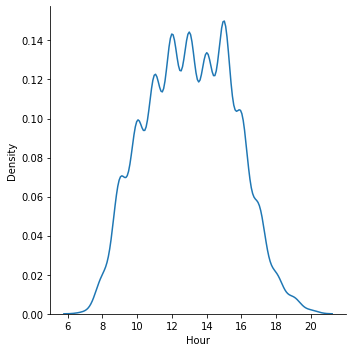

In [106]:
sns.displot(df1, x="Hour", kind="kde", bw_adjust=2)

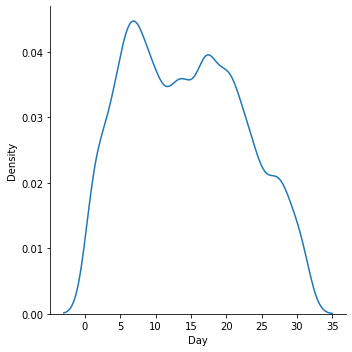

In [110]:

sns.displot(df1, x="Day", kind="kde", bw_adjust=2)

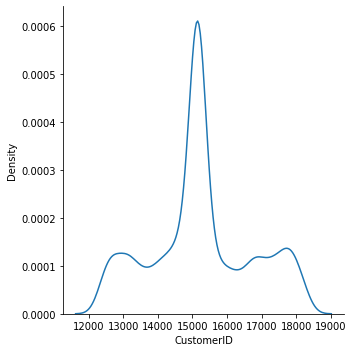

In [111]:

sns.displot(df1, x="CustomerID", kind="kde", bw_adjust=2)

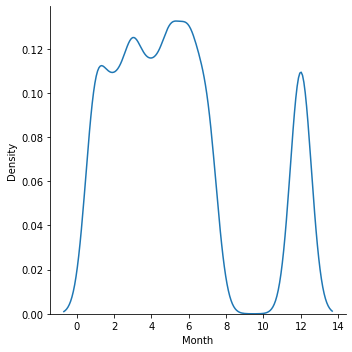

In [112]:

sns.displot(df1, x="Month", kind="kde", bw_adjust=2)

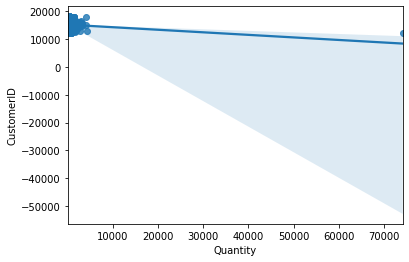

In [117]:
sns.regplot(x="Quantity", y="CustomerID", data=df1)

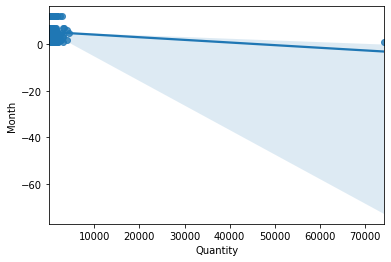

In [118]:
sns.regplot(x="Quantity", y="Month", data=df1)

In [ ]:
sns.regplot(x="Quantity", y="Day", data=df1)

In [ ]:
sns.regplot(x="Quantity", y="Hour", data=df1)